In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('mmALL_073119_csv (1).csv')

In [5]:
df.shape

(16363, 31)

In [6]:
df.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [7]:
# Protest is 1 if there was a protest and 0 if not
# Protest number is referring to the the number of protest in current year 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [9]:
if protest >= 1

SyntaxError: invalid syntax (<ipython-input-9-6a0bb6468dd8>, line 1)

In [ ]:
df.head(4)

In [ ]:
df.groupby(['region', 'country'])['id'].count().sort_index

In [ ]:
df.groupby(['region'])['id'].count().sort_values(ascending = False)

In [ ]:
df.groupby(['country'])['id'].count().sort_values(ascending = False)

### Europe leads with the most amount of protests 
* political behavior is the leading cause of most protests 

### political behavior is the leading cause of protests globally

### are types common with that of the other regions?
### what is the change over time?




In [ ]:
df['protesterdemand1'].value_counts()

In [ ]:
df['stateresponse1'].value_counts()

In [ ]:
pd.crosstab(df['region'], df['protesterdemand1'])

In [ ]:
pd.crosstab(df['region'], df['stateresponse1'])

In [ ]:
df.groupby(['region'])['protesterdemand1'].value_counts(normalize = True)



In [ ]:
df.groupby(['region'])['stateresponse1'].value_counts(normalize = True)

### in relation to the amount of protests per region, Middle Eastern North Africa has the most killings 

### Europe, North America, and Oceania have the least 

In [ ]:
df.groupby(['protesterdemand1'])['region'].value_counts(normalize = True)

In [ ]:
df.groupby(['stateresponse1'])['region'].value_counts(normalize = True)

In [ ]:
# histogram of length of days 

In [ ]:
# Corr with length of days and outcomes 


In [ ]:
plt.bar(df['year'], df['protest'])

In [ ]:
# changed 

df['outcome'] = df['stateresponse1'].apply(lambda x: 1 if x == 'accomodation' else int(0))

In [ ]:
df['outcome'].value_counts()

In [ ]:
df['outcome'].value_counts( normalize = True)

In [ ]:
# plt.scatter(df['stateresponse1'], df['protesterdemand1'])

In [ ]:
# if statement for the 

In [ ]:
df.groupby(['protesterviolence'])['stateresponse1'].value_counts(normalize = True)

In [ ]:
df.groupby(['protesterviolence','region'])['stateresponse1'].value_counts(normalize = True)

### Data with no null dates

In [11]:
# created a second data frame based on 1 or more protest 
# alternative to deleting NaN dates 

df2 = df[df['protestnumber']>0].copy()

In [12]:
df2['startyear'] = df2['startyear'].astype(int)
df2['startmonth'] = df2['startmonth'].astype(int)
df2['startday'] = df2['startday'].astype(int)
df2['endyear'] = df2['endyear'].astype(int)
df2['endmonth'] = df2['endmonth'].astype(int)
df2['endday'] = df2['endday'].astype(int)


In [13]:
df2['startdate'] = df2.apply(lambda x: datetime.date(x['startyear'], x['startmonth'], x['startday']), axis = 1)

df2['enddate'] = df2.apply(lambda x: datetime.date(x['endyear'], x['endmonth'], x['endday']), axis = 1)

In [14]:
df2['startdate'] = pd.to_datetime(df2['startdate'])
df2['enddate'] = pd.to_datetime(df2['enddate'])

In [15]:
df2['datedelta'] = df2['enddate'] - df2['startdate']


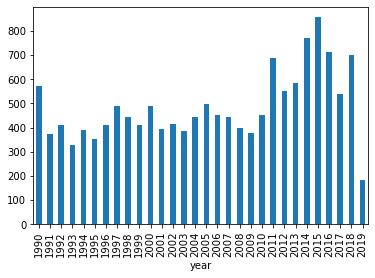

In [16]:
df2.groupby(['year'])['id'].count().sort_index().plot.bar()

### Protests counts per region

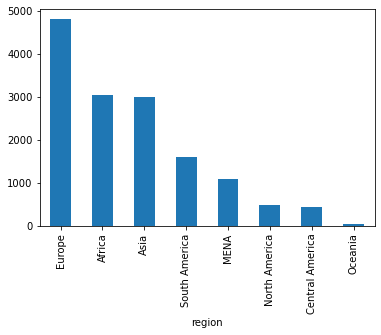

In [17]:
df2.groupby(['region'])['id'].count().sort_values(ascending = False).plot.bar()

### Protests by year by region

In [18]:
pd.crosstab(df2['region'], df2['year']).style.background_gradient(cmap = 'coolwarm')

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,82,98,84,85,84,55,67,98,81,63,83,83,76,67,93,123,84,64,73,71,137,145,164,128,71,275,200,118,166,25
Asia,117,51,63,40,66,49,76,96,110,108,127,89,76,76,108,125,156,128,131,82,71,157,111,134,223,134,89,68,107,19
Central America,6,8,12,15,13,28,16,18,15,12,21,19,16,22,21,21,11,7,9,14,5,13,10,15,4,44,7,4,27,4
Europe,287,132,153,128,119,147,164,188,144,128,155,92,146,144,122,126,123,146,83,110,155,152,155,180,266,229,254,224,287,72
MENA,12,15,19,9,18,6,11,9,11,9,16,19,18,15,16,40,21,23,30,46,30,182,71,73,130,62,40,36,66,43
North America,17,14,9,10,27,20,12,14,16,15,17,8,7,12,14,8,13,7,7,7,7,5,9,10,33,57,71,33,14,7
Oceania,3,2,0,1,0,1,1,2,1,0,2,5,0,0,2,5,0,0,0,1,2,1,3,1,1,0,1,3,0,0
South America,48,52,69,41,63,49,62,63,64,76,67,78,76,52,67,49,46,70,65,45,45,33,30,45,41,56,51,54,32,13
